In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
# Load the dataset
file_path = r"C:\Users\Student\Downloads\Salary Data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [26]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load the Data
file_path = r"C:\Users\Student\Downloads\Salary Data.csv"
data = pd.read_csv(file_path)

# Step 3: Explore the Data
print("First few rows of the dataset:")
print(data.head())

print("\nData Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# Step 4: Check for Missing Values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 5: Handle Missing Values

# 5.1: Fill missing values for numerical columns with their mean
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# 5.2: Fill missing values for categorical columns with the mode (most common value)
categorical_columns = ['JobTitle', 'Agency', 'Status']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# 5.3: Optionally drop any remaining rows with missing values (if necessary)
data.dropna(inplace=True)

# Step 6: Verify Missing Values After Cleaning
print("\nMissing values after handling:")
print(data.isnull().sum())

# Step 7: Display the cleaned data
print("\nCleaned dataset:")
print(data.head())


First few rows of the dataset:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years 

KeyError: 'BasePay'

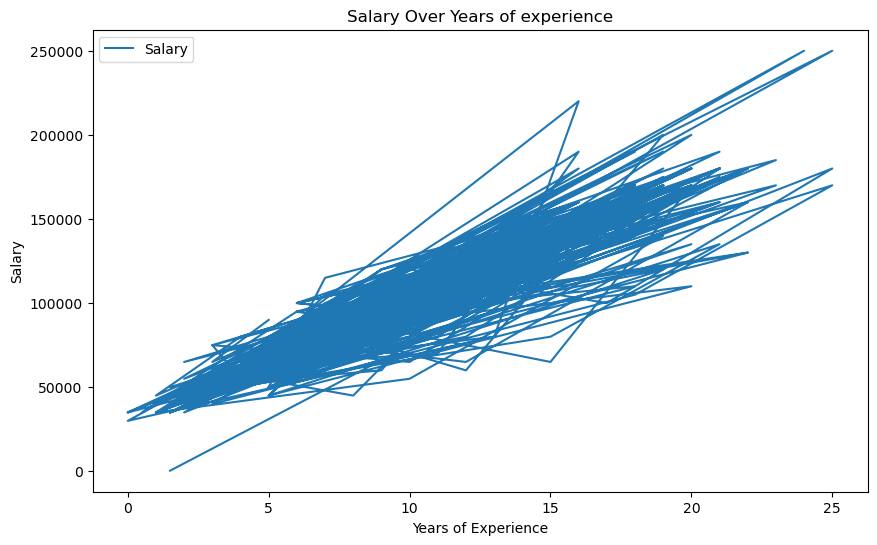

In [27]:
import  matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data['Years of Experience'],data['Salary'] , label ='Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Over Years of experience')
plt.legend()
plt.show()

In [21]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

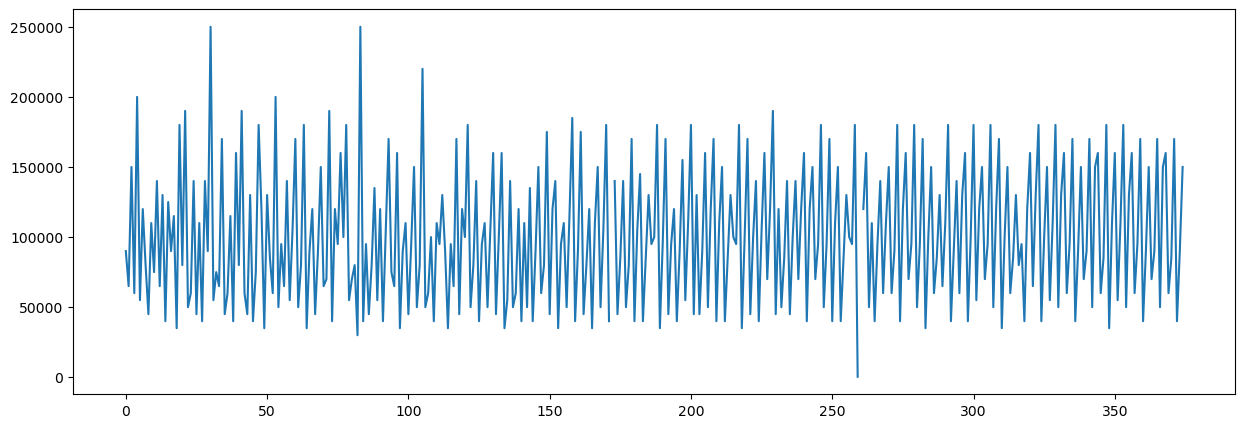

In [22]:
plt.figure(figsize=(15,5))
data['Salary'].plot();

In [30]:
missing_values = data['Salary'].isnull().sum()
print(f"Missing values in 'Salary': {missing_values}")


if missing_values > 0:
    # Fill missing values with the mean
    data['Salary'] = data['Salary'].fillna(data['Salary'].mean())

# Step 3: Confirm Changes
missing_values_after = data['Salary'].isnull().sum()
print(f"Missing values in 'Salary' after handling: {missing_values_after}")



Missing values in 'Salary': 0
Missing values in 'Salary' after handling: 0


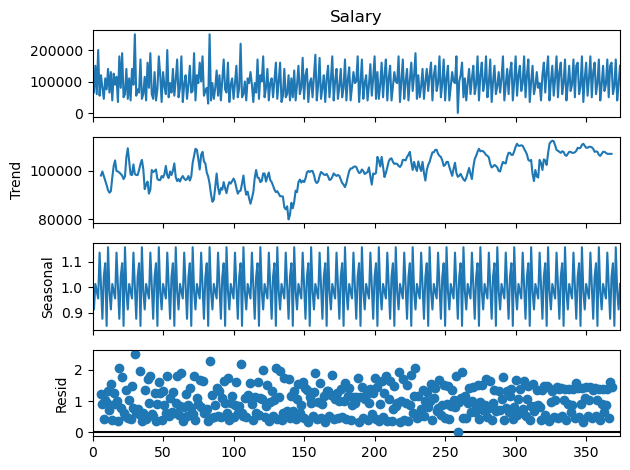

In [31]:
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
dec = sm.tsa.seasonal_decompose(data['Salary'],period = 12, model = 'multiplicative').plot()
plt.show()

In [15]:
import pandas as pd
from prophet import Prophet
#Renaming columns to match Prophet's requirements'
data.rename(columns={'Years of Experience' : 'ds', 'Salary': 'y'}, inplace=True)
#Instatiate Prophet object(sibiza iModel/fitting)
m= Prophet()
m.fit(data)

14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
389,1970-12-28 00:00:00.000000025
390,1970-12-29 00:00:00.000000025
391,1970-12-30 00:00:00.000000025
392,1970-12-31 00:00:00.000000025
393,1971-01-01 00:00:00.000000025


In [36]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ValueError: Found NaN in column ds.

In [37]:
#Plotting the forecast by calling the prophet
fig1 =m.plot(forecast)

NameError: name 'forecast' is not defined

In [14]:
#by default i will see trend by using the following command
fig2 =m.plot_components(forecast)

NameError: name 'forecast' is not defined